In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd

path = "/content/drive/MyDrive/ANDAT/UAS/"

train = pd.read_excel(path + "train.xlsx")
test  = pd.read_excel(path + "test.xlsx")

train.head(), test.head()


(   index  Nomor peserta  Nomor keluarga       Bobot ID Kunjungan FKTP  \
 0      0       73913167        73913167   62.487934  137661220P000223   
 1      1      187825971       187825969   11.345645  478791120P000005   
 2      2       53940892        53940892  122.385887        1135614839   
 3      3        8671315        52616999   85.407494  232430219Y001189   
 4      4       19451459        79653335   62.295994        1299223191   
 
   Tanggal Datang Tanggal Pulang   Provinsi Faskes Kepemilikan Faskes  \
 0     2020-12-12     2020-12-12        Jawa Timur           SwastaÂ    
 1     2020-11-02     2020-11-02     DI Yogyakarta           SwastaÂ    
 2     2020-02-04     2020-02-04       DKI Jakarta            PemProv   
 3     2019-02-24     2019-02-24             Jambi           SwastaÂ    
 4     2020-08-18     2020-08-18  Sumatera Selatan             PemKab   
 
      Jenis Faskes  ...  Jenis Poli Segmen Peserta  \
 0  Klinik Pratama  ...   POLI UMUM           PBPU   
 1  Kl

In [16]:
train.shape
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   index                       600000 non-null  int64         
 1   Nomor peserta               600000 non-null  int64         
 2   Nomor keluarga              600000 non-null  int64         
 3   Bobot                       600000 non-null  float64       
 4   ID Kunjungan FKTP           600000 non-null  object        
 5   Tanggal Datang              600000 non-null  datetime64[ns]
 6   Tanggal Pulang              600000 non-null  datetime64[ns]
 7   Provinsi Faskes             600000 non-null  object        
 8   Kepemilikan Faskes          600000 non-null  object        
 9   Jenis Faskes                600000 non-null  object        
 10  Tipe Faskes                 600000 non-null  object        
 11  Tingkat Pelayanan Faskes    600000 non-

,index,Nomor peserta,Nomor keluarga,Bobot,ID Kunjungan FKTP,Tanggal Datang,Tanggal Pulang,Provinsi Faskes,Kepemilikan Faskes,Jenis Faskes,...,Jenis Poli,Segmen Peserta,Diagnosis,Provinsi Faskes Rujukan,Kepemilikan Faskes Rujukan,Jenis Faskes Rujukan,Tipe Faskes Rujukan,Jenis Poli Rujukan,Jenis Kunjungan Faskes,Status Peserta
0,0,73913167,73913167,62.487934,137661220P000223,2020-12-12,2020-12-12,Jawa Timur,SwastaÂ,Klinik Pratama,...,POLI UMUM,PBPU,Insulin-dependent diabetes mellitus with coma,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sakit,Belum_Sehat
1,1,187825971,187825969,11.345645,478791120P000005,2020-11-02,2020-11-02,DI Yogyakarta,SwastaÂ,Klinik Pratama,...,POLI KIA,Bukan pekerja,Prolonged pregnancy,DI Yogyakarta,Swasta,Puskesmas,RS Swasta Setara Type D,MISSING,Kunjungan sakit,Belum_Sehat
2,2,53940892,53940892,122.385887,1135614839,2020-02-04,2020-02-04,DKI Jakarta,PemProv,Puskesmas,...,Konseling,PBI APBD,9999,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sehatÂ,Sehat
3,3,8671315,52616999,85.407494,232430219Y001189,2019-02-24,2019-02-24,Jambi,SwastaÂ,Klinik Pratama,...,POLI UMUM,PPUÂ,"Acute upper respiratory infection, unspecified",NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sakit,Belum_Sehat
4,4,19451459,79653335,62.295994,1299223191,2020-08-18,2020-08-18,Sumatera Selatan,PemKab,Puskesmas,...,Home-Visit,PBI APBN,9999,NaN,Tidak dirujuk,Tidak dirujuk,NaN,TIDAK DIRUJUK,Kunjungan sehatÂ,Sehat


In [17]:
train["Provinsi Faskes"].nunique()

34

In [18]:
#Fitur 1 (Nentuin jumlah faskes dari ID kunjungan FKTP)
jumlah_faskes = (
    train
    .groupby("Provinsi Faskes")["ID Kunjungan FKTP"]
    .nunique()
    .reset_index(name="jumlah_faskes")
)

In [19]:
jumlah_faskes.head()

,Provinsi Faskes,jumlah_faskes
0,Aceh,13172
1,Bali,18814
2,Banten,22925
3,Bengkulu,10877
4,DI Yogyakarta,10660


In [20]:
jumlah_faskes.shape

(34, 2)

In [21]:
#Fitur 2 (Jumlah Kunjungan)
jumlah_kunjungan = (
    train
    .groupby("Provinsi Faskes")
    .size()
    .reset_index(name="jumlah_kunjungan")
)


In [22]:
jumlah_kunjungan.head()

,Provinsi Faskes,jumlah_kunjungan
0,Aceh,13172
1,Bali,18814
2,Banten,22925
3,Bengkulu,10877
4,DI Yogyakarta,10660


In [23]:
jumlah_kunjungan.shape


(34, 2)

In [24]:
#Gabungin Fitur 1 dan 2 biar tiap baris provinsi mencakup 2 fitur tersebut
fitur = jumlah_faskes.merge(
    jumlah_kunjungan,
    on="Provinsi Faskes"
)

fitur.head()


,Provinsi Faskes,jumlah_faskes,jumlah_kunjungan
0,Aceh,13172,13172
1,Bali,18814,18814
2,Banten,22925,22925
3,Bengkulu,10877,10877
4,DI Yogyakarta,10660,10660


In [25]:
fitur.shape

(34, 3)

In [27]:
#Fitur 3 (Rata-rata Beban layanan faskes tiap provinsi)
rata_bobot = (
    train
    .groupby("Provinsi Faskes")["Bobot"]
    .mean()
    .reset_index(name="rata_bobot")
)
rata_bobot.head()

,Provinsi Faskes,rata_bobot
0,Aceh,104.330751
1,Bali,66.804439
2,Banten,156.538132
3,Bengkulu,54.527602
4,DI Yogyakarta,121.684515


In [28]:
rata_bobot.shape

(34, 2)

In [29]:
#Gabungin ke fitur yang uda ada
fitur = fitur.merge(
    rata_bobot,
    on="Provinsi Faskes"
)

fitur.head()


,Provinsi Faskes,jumlah_faskes,jumlah_kunjungan,rata_bobot
0,Aceh,13172,13172,104.330751
1,Bali,18814,18814,66.804439
2,Banten,22925,22925,156.538132
3,Bengkulu,10877,10877,54.527602
4,DI Yogyakarta,10660,10660,121.684515


In [30]:
fitur.shape

(34, 4)

In [32]:
#Fitur 4 (Total beban keseluruhan wilayah)
total_bobot = (
    train
    .groupby("Provinsi Faskes")["Bobot"]
    .sum()
    .reset_index(name="total_bobot")
)
total_bobot.head()

,Provinsi Faskes,total_bobot
0,Aceh,1.374245e+06
1,Bali,1.256859e+06
2,Banten,3.588637e+06
3,Bengkulu,5.930967e+05
4,DI Yogyakarta,1.297157e+06


In [33]:
total_bobot.shape

(34, 2)

In [35]:
#Gabungin fitur
fitur = fitur.merge(
    total_bobot,
    on="Provinsi Faskes"
)

fitur.head()


,Provinsi Faskes,jumlah_faskes,jumlah_kunjungan,rata_bobot,total_bobot
0,Aceh,13172,13172,104.330751,1.374245e+06
1,Bali,18814,18814,66.804439,1.256859e+06
2,Banten,22925,22925,156.538132,3.588637e+06
3,Bengkulu,10877,10877,54.527602,5.930967e+05
4,DI Yogyakarta,10660,10660,121.684515,1.297157e+06


In [36]:
#Cek final bentuk fitur
fitur.shape

(34, 5)

In [43]:
#Pisahin kolom provinsi dan angka
X = fitur.drop(columns=["Provinsi Faskes"])
X.head()

,jumlah_faskes,jumlah_kunjungan,rata_bobot,total_bobot
0,13172,13172,104.330751,1.374245e+06
1,18814,18814,66.804439,1.256859e+06
2,22925,22925,156.538132,3.588637e+06
3,10877,10877,54.527602,5.930967e+05
4,10660,10660,121.684515,1.297157e+06


In [44]:
from sklearn.preprocessing import StandardScaler
#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


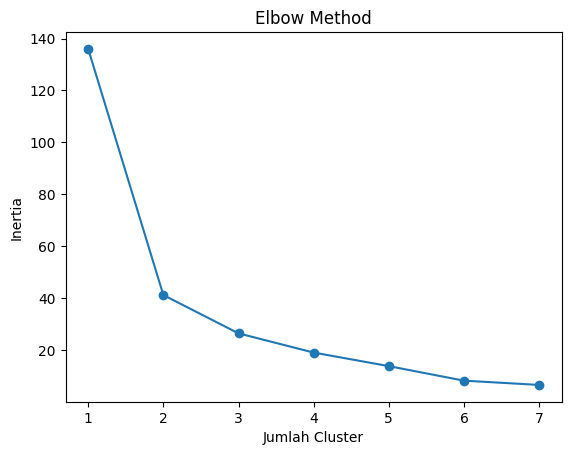

In [46]:
#Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker="o")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [48]:
#Train Models
kmeans = KMeans(n_clusters=3, random_state=42)
cluster = kmeans.fit_predict(X_scaled)

#Tambahin Hasil Cluster ke data
fitur["cluster"] = cluster
fitur.head()


,Provinsi Faskes,jumlah_faskes,jumlah_kunjungan,rata_bobot,total_bobot,cluster
0,Aceh,13172,13172,104.330751,1.374245e+06,0
1,Bali,18814,18814,66.804439,1.256859e+06,0
2,Banten,22925,22925,156.538132,3.588637e+06,2
3,Bengkulu,10877,10877,54.527602,5.930967e+05,0
4,DI Yogyakarta,10660,10660,121.684515,1.297157e+06,0


In [52]:
fitur.groupby("cluster")[[
    "jumlah_faskes",
    "jumlah_kunjungan",
    "rata_bobot",
    "total_bobot"
]].mean()


,jumlah_faskes,jumlah_kunjungan,rata_bobot,total_bobot
cluster,,,,
0,9235.407407,9235.407407,78.089385,7.691267e+05
1,80435.666667,80435.666667,132.055045,1.053730e+07
2,27334.250000,27334.250000,159.708578,4.313026e+06


In [56]:
label_map = {
    0: "Kurang Memadai",
    2: "Cukup Memadai",
    1: "Memadai"
}

fitur["kategori_faskes"] = fitur["cluster"].map(label_map)
fitur[["Provinsi Faskes", "cluster", "kategori_faskes"]].head()



,Provinsi Faskes,cluster,kategori_faskes
0,Aceh,0,Kurang Memadai
1,Bali,0,Kurang Memadai
2,Banten,2,Cukup Memadai
3,Bengkulu,0,Kurang Memadai
4,DI Yogyakarta,0,Kurang Memadai


In [57]:
fitur["kategori_faskes"].value_counts()


,count
kategori_faskes,
Kurang Memadai,27
Cukup Memadai,4
Memadai,3


In [58]:
#cek interval validation (Apakah cluster yang terbentuk itu rapih, terpisah, dan masuk akal?)
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, cluster)
sil_score

np.float64(0.607969352147975)

In [59]:
scores = {}

for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    lbl = km.fit_predict(X_scaled)
    scores[k] = silhouette_score(X_scaled, lbl)

scores


{2: np.float64(0.7405250219210232),
 3: np.float64(0.607969352147975),
 4: np.float64(0.40434563750099045),
 5: np.float64(0.4023021028497504),
 6: np.float64(0.4172439073683442)}